# Importing all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

# Reading the data files

In [12]:
train1 = pd.read_csv('train_1.csv')    # Reading the 1st training file
train2 = pd.read_csv('train_2.csv')    # Reading the 2nd training file
test = pd.read_csv('test.csv')    # Reading the testing file

# Renaming the data file with understandable column names

In [13]:
# Renaming columns of train1 file
train1.rename({'X1':'Credit_Amount','X2':'Gender','X3':'Education','X4':'Marital_Status','X5':'Age',
               'X6':'Sept_Repayment_status','X7':'Aug_Repayment_status','Y':'is_Default'}, axis=1, inplace=True)

# Renaming columns of train2 file
train2.rename({'X8':'Jul_Repayment_status','X9':'Jun_Repayment_status','X10':'May_Repayment_status',
               'X11':'Apr_Repayment_status','X12':'Sept_Bill_stmt','X13':'Aug_Bill_stmt',
               'X14':'Jul_Bill_stmt','X15':'Jun_Bill_stmt'}, axis=1, inplace=True)

In [14]:
train1.head()   # Checking the first 5 elements of train1 file

,Ref.No,Credit_Amount,Gender,Education,Marital_Status,Age,Sept_Repayment_status,Aug_Repayment_status,is_Default
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1


In [15]:
train2.head()   # Checking the first 5 elements of train2 file

,Ref.No,Jul_Repayment_status,Jun_Repayment_status,May_Repayment_status,Apr_Repayment_status,Sept_Bill_stmt,Aug_Bill_stmt,Jul_Bill_stmt,Jun_Bill_stmt
0,22203,2,2,2,2,43243,42537,41370,40694
1,1288,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,0,0,0,0,20415,18266,18921,19297
3,15085,0,0,0,-1,76015,77582,60311,62471
4,6192,-2,-2,-2,-2,0,0,0,0


# Merging both the training files

In [19]:
train = pd.merge(train1,train2)    # Merging both the training files into 1 single file

In [20]:
train.head()   # Checking the first 5 elements of merged train file

,Ref.No,Credit_Amount,Gender,Education,Marital_Status,Age,Sept_Repayment_status,Aug_Repayment_status,is_Default,Jul_Repayment_status,Jun_Repayment_status,May_Repayment_status,Apr_Repayment_status,Sept_Bill_stmt,Aug_Bill_stmt,Jul_Bill_stmt,Jun_Bill_stmt
0,22203,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,1288,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,15085,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,6192,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [24]:
test.head()   # Checking the first 5 elements of test file

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,...,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,...,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,...,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,...,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,...,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [46]:
train.profile_report()    # doing basic EDA check using Pandas Profiling

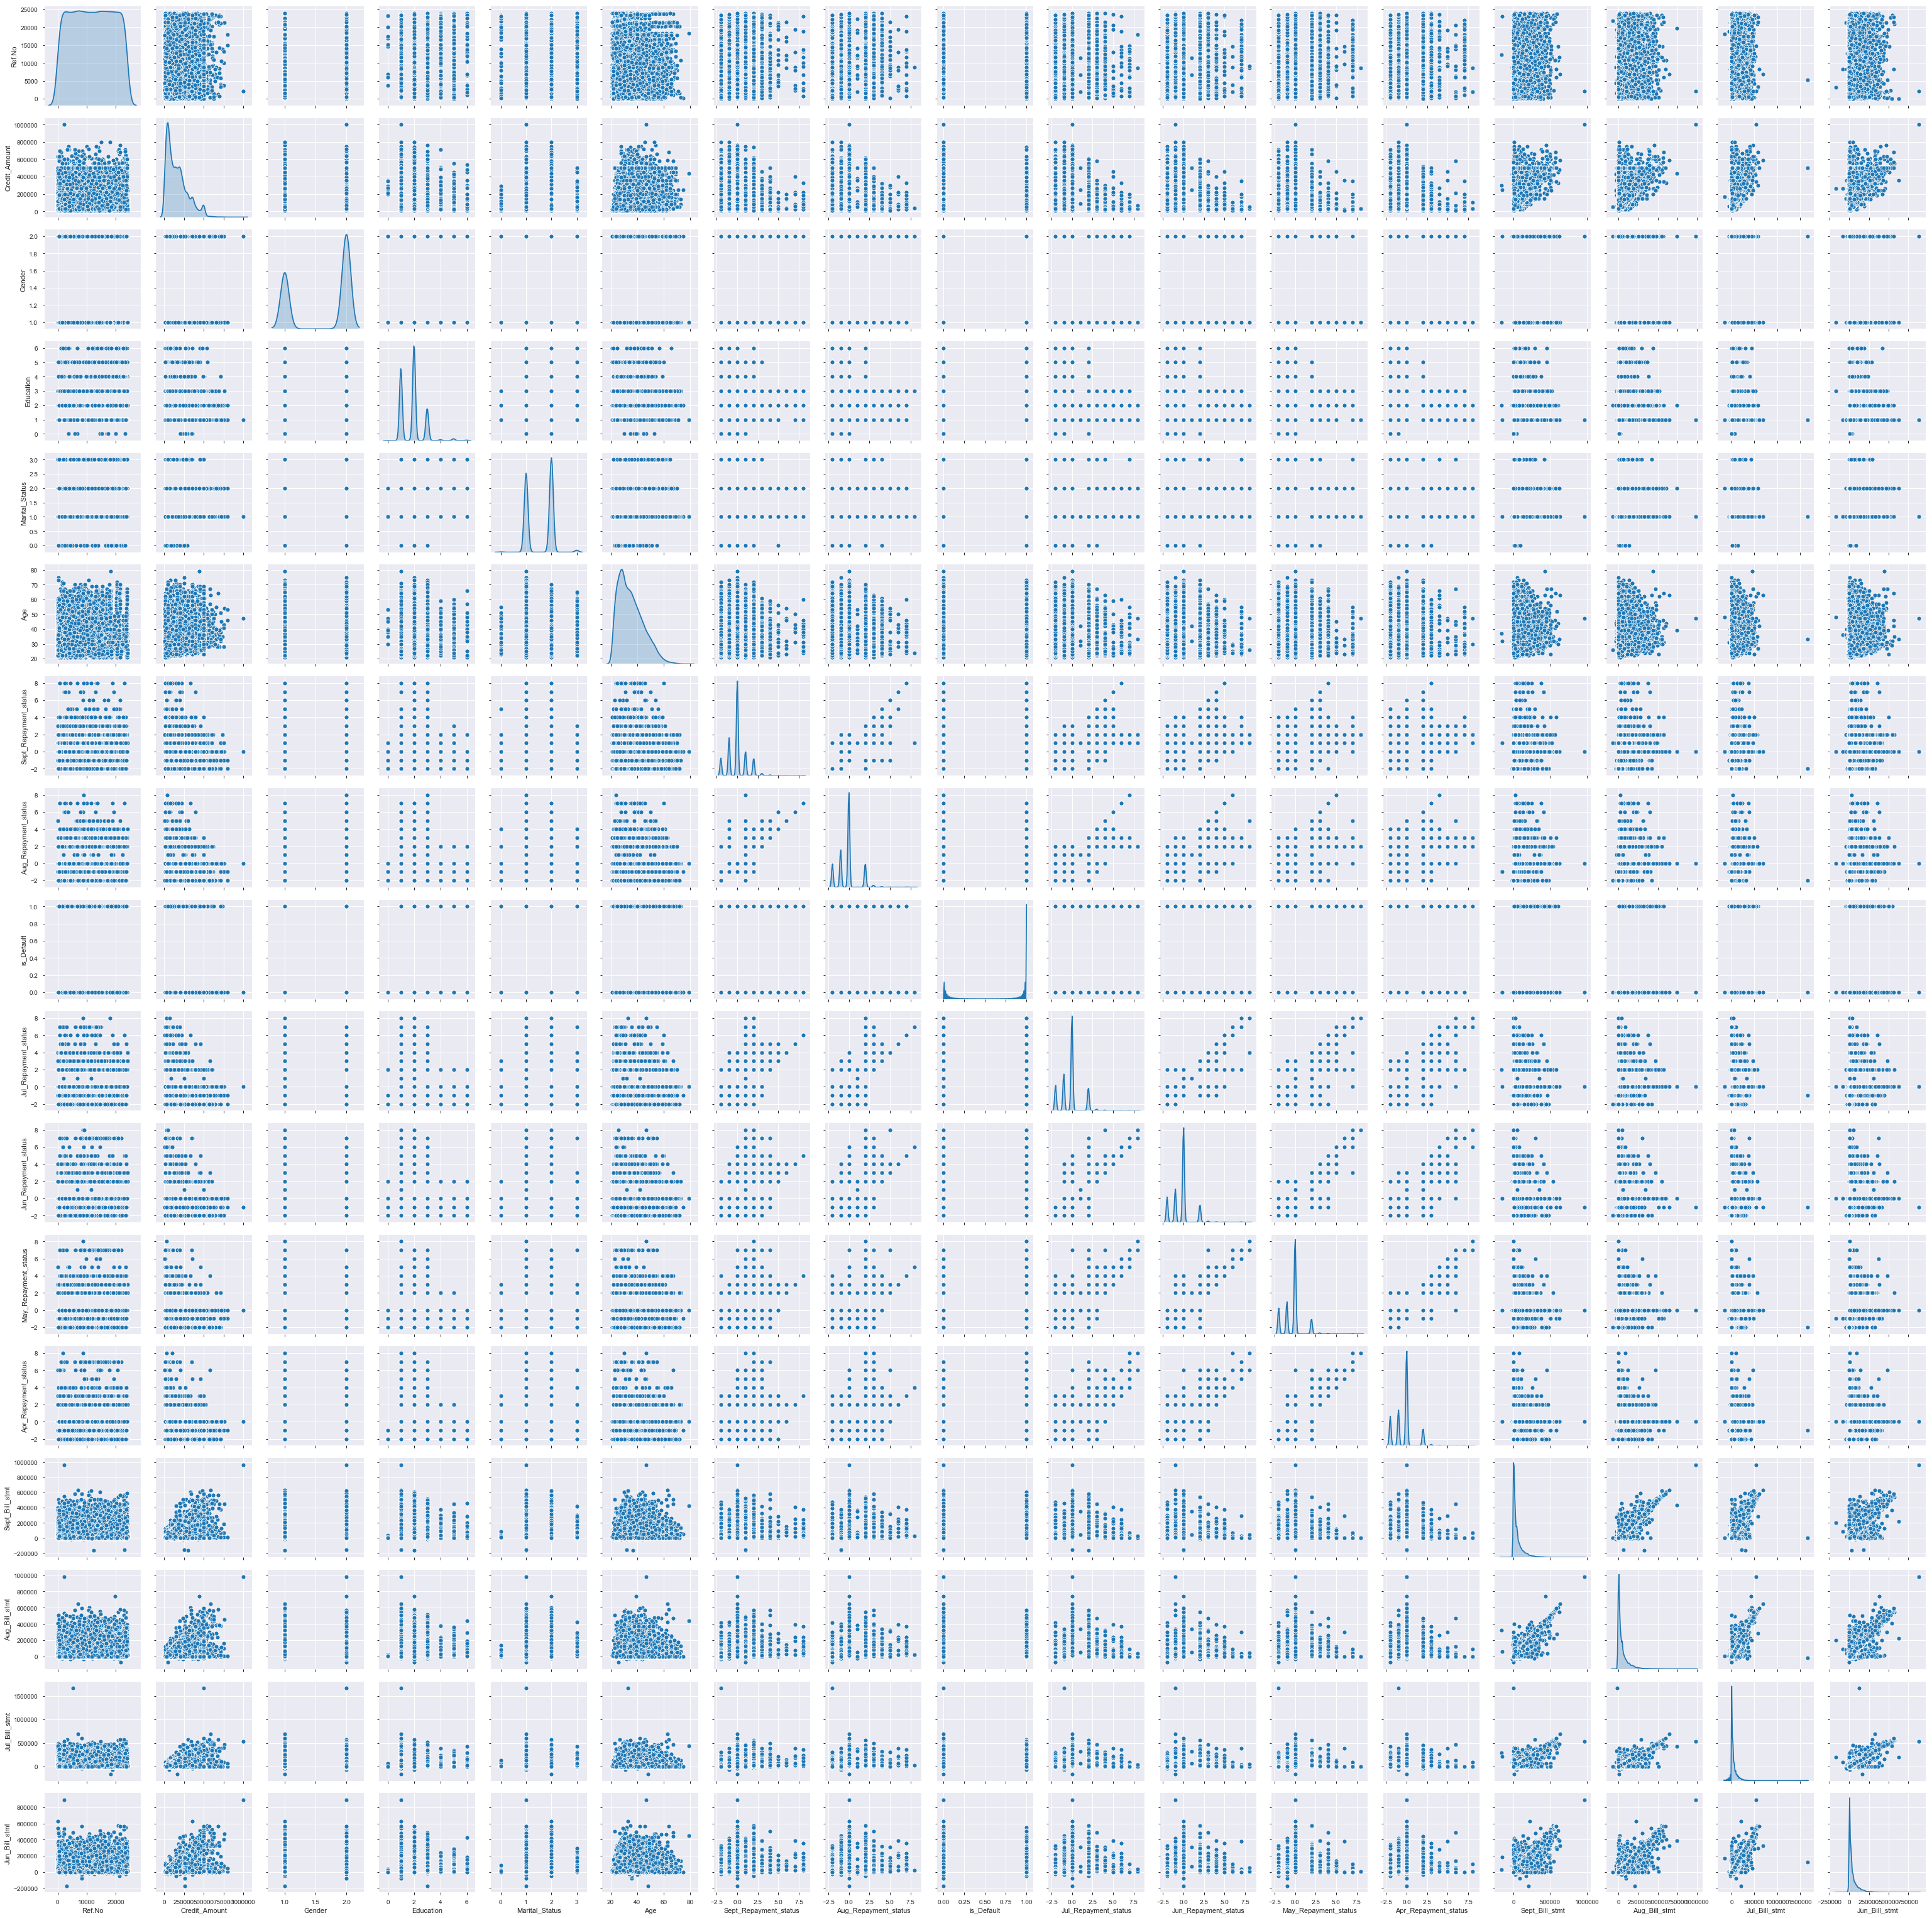

In [49]:
sns.pairplot(train, diag_kind='kde')   # Creating a pair plot of the merged training file

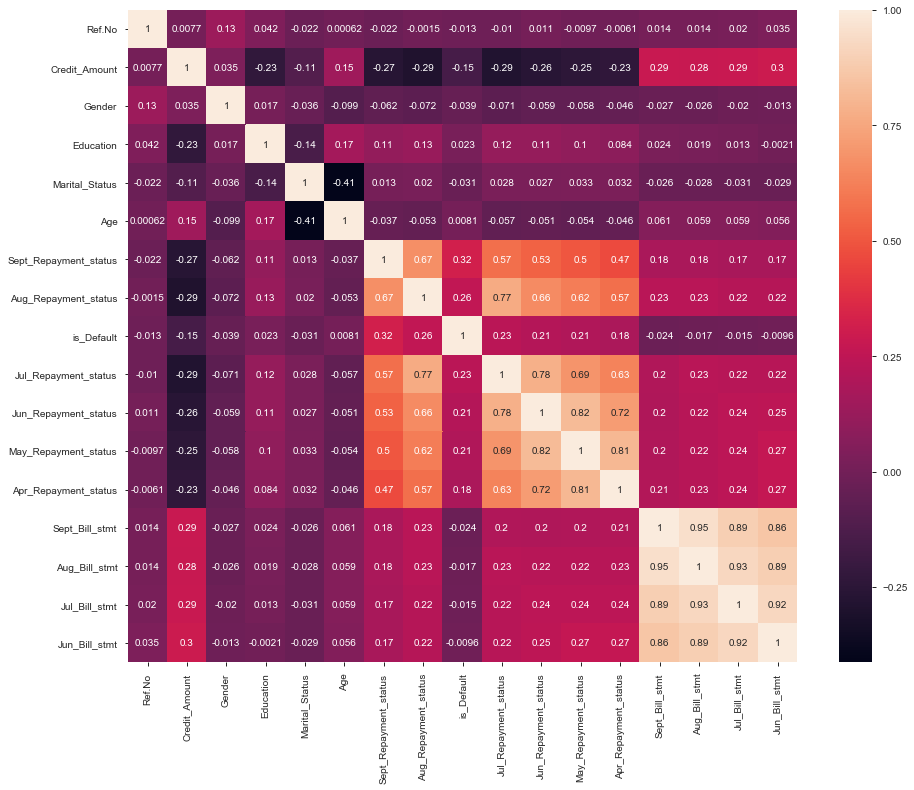

In [53]:
plt.figure(figsize=(15,12))   # Increasing the graph size for a better visibility
sns.heatmap(train.corr(), annot=True)    # Creating the heatmap of merged tarining file to chech for corelation

# Splitting the data into predictor and target variables and taking only the required columns from the test file

In [25]:
X = train.drop(['Ref.No','is_Default'],axis=1)   # Extracting the predictor variables
y = train.is_Default    # Extracting the target variable
X_testfile = test.iloc[:,1:16]

# Applying Standard scalar to the data

In [26]:
sc = StandardScaler()    # Initializing the Standard Scalar
scaledX_train = sc.fit_transform(X)    # Fitting the training data to a standard scaling
scaledX_test = sc.transform(X_testfile)     # Transforming the testing data with respect to training data

# Applying Simple RandomForest with no hyper parameter tuning

In [27]:
rf = RandomForestClassifier(criterion='entropy')   # Initializing the Random Forest Model
rf_pred = rf.fit(scaledX_train,y).predict(scaledX_test)  # predicting the target using model

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
rf_pred    # Printing the predicted values from a simple random forest without any hyper parameter tuning.

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Saving the predicted values in a file for Kaggle Submission

In [29]:
df1 = pd.DataFrame(rf_pred, columns=['Y'])

df2 = pd.DataFrame(np.arange(1,2400), columns=['Ref.No'])

submission = pd.concat([df2, df1], axis=1)

submission.to_csv('test1 Submission.csv', index=False)
# Saving the predicted values in a sample file to be uploaded to kaggle

# Importing GridSearch CV

In [32]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {'n_estimators':range(15,23),
          'max_depth':range(10,20),
          'min_samples_split':range(7,14)}

# Setting up parameters for grid search cv

In [39]:
model= GridSearchCV(estimator=rf, param_grid=params)    # Initializing the Grid Search model

In [40]:
md1 = model.fit(scaledX_train,y).predict(scaledX_test)    # Fitting the CV model with various parameter values

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Finding out the best parameters for the RandomForest

In [41]:
model.best_estimator_   # finding out the best hyper parameter values for the model to be build.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Applying Random Forest with tuned parameters

In [42]:
# Creating Random Forest model with the best estimated values found using Grid search CV
rf = RandomForestClassifier(criterion='entropy',n_estimators=22,max_depth=11,min_samples_split=12)

In [43]:
rf_pred = rf.fit(scaledX_train,y).predict(scaledX_test)   # Predicting the values

In [44]:
rf_pred   # Printing the predicted values

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [45]:
df1 = pd.DataFrame(rf_pred, columns=['Y'])

df2 = pd.DataFrame(np.arange(1,2400), columns=['Ref.No'])

submission = pd.concat([df2, df1], axis=1)

submission.to_csv('test2 Submission.csv', index=False)    
# Saving the predicted values in a sample file to be uploaded to kaggle

# Result: The above model with tuned parameters gave an accuracy of 0.81742